In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [5]:
zoo = pd.read_csv('Zoo.csv')

In [6]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [10]:
zoo[zoo.duplicated()].shape

(0, 18)

In [11]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [12]:
df = zoo.drop_duplicates()

In [13]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [14]:
corr = df.corr()

In [15]:
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

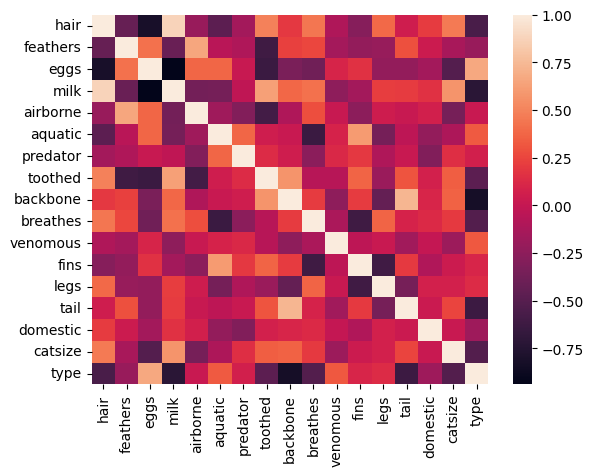

In [17]:
sns.heatmap(corr)


<Axes: xlabel='domestic', ylabel='venomous'>

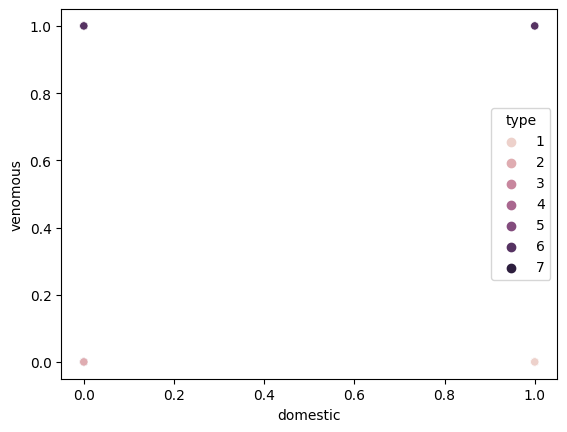

In [22]:
sns.scatterplot(data=df,x='domestic',y='venomous',hue = 'type')

In [25]:
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow") for i in zoo.type]
unique_color = list(set(color_list))
unique_color

['red', 'yellow']

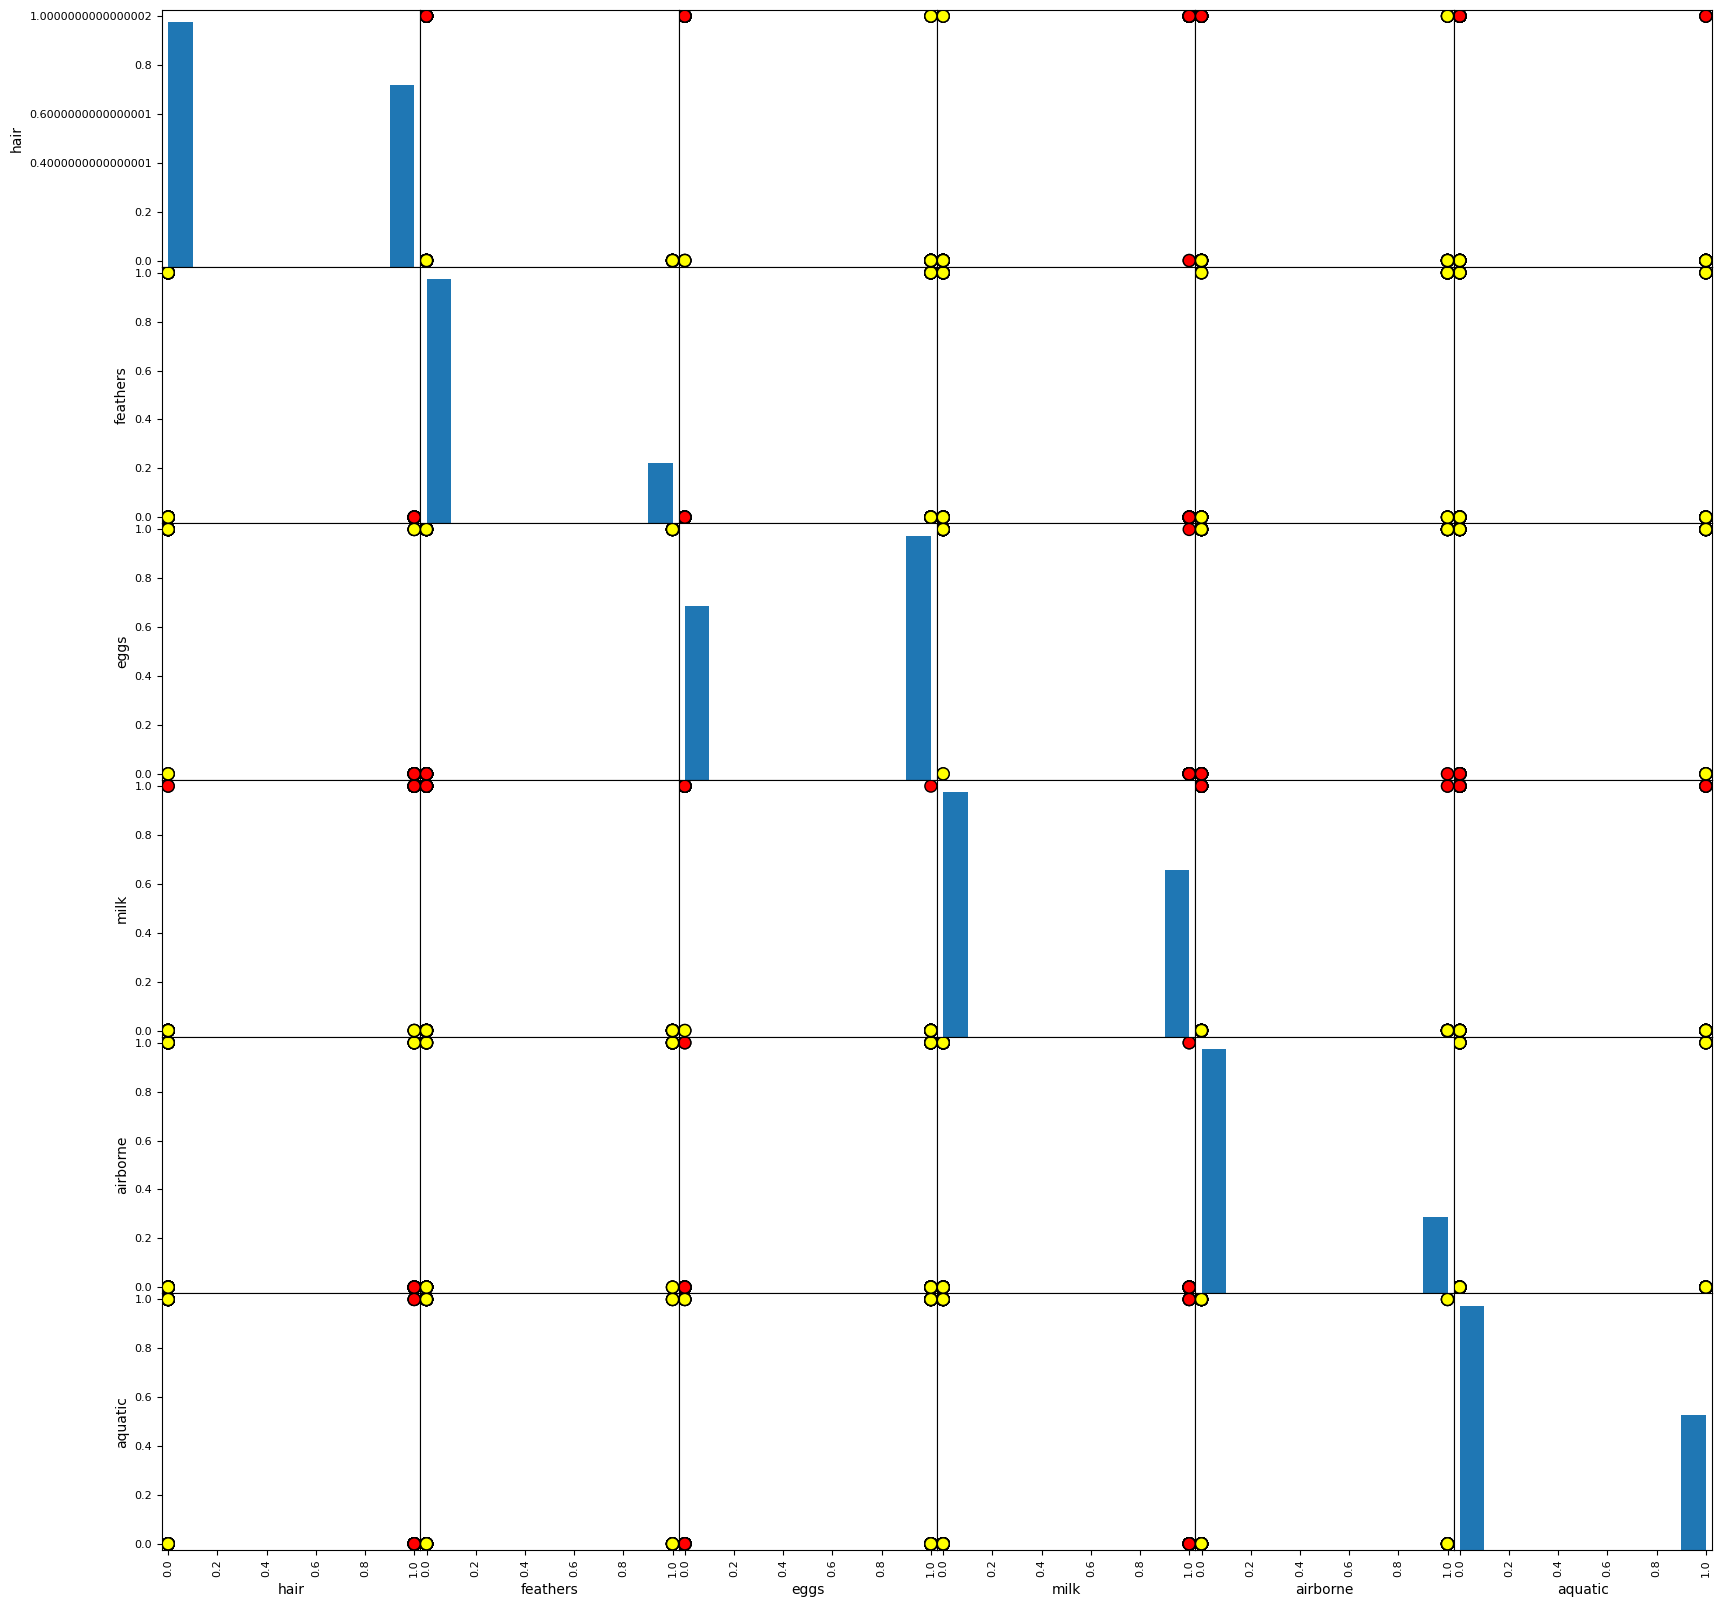

In [26]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

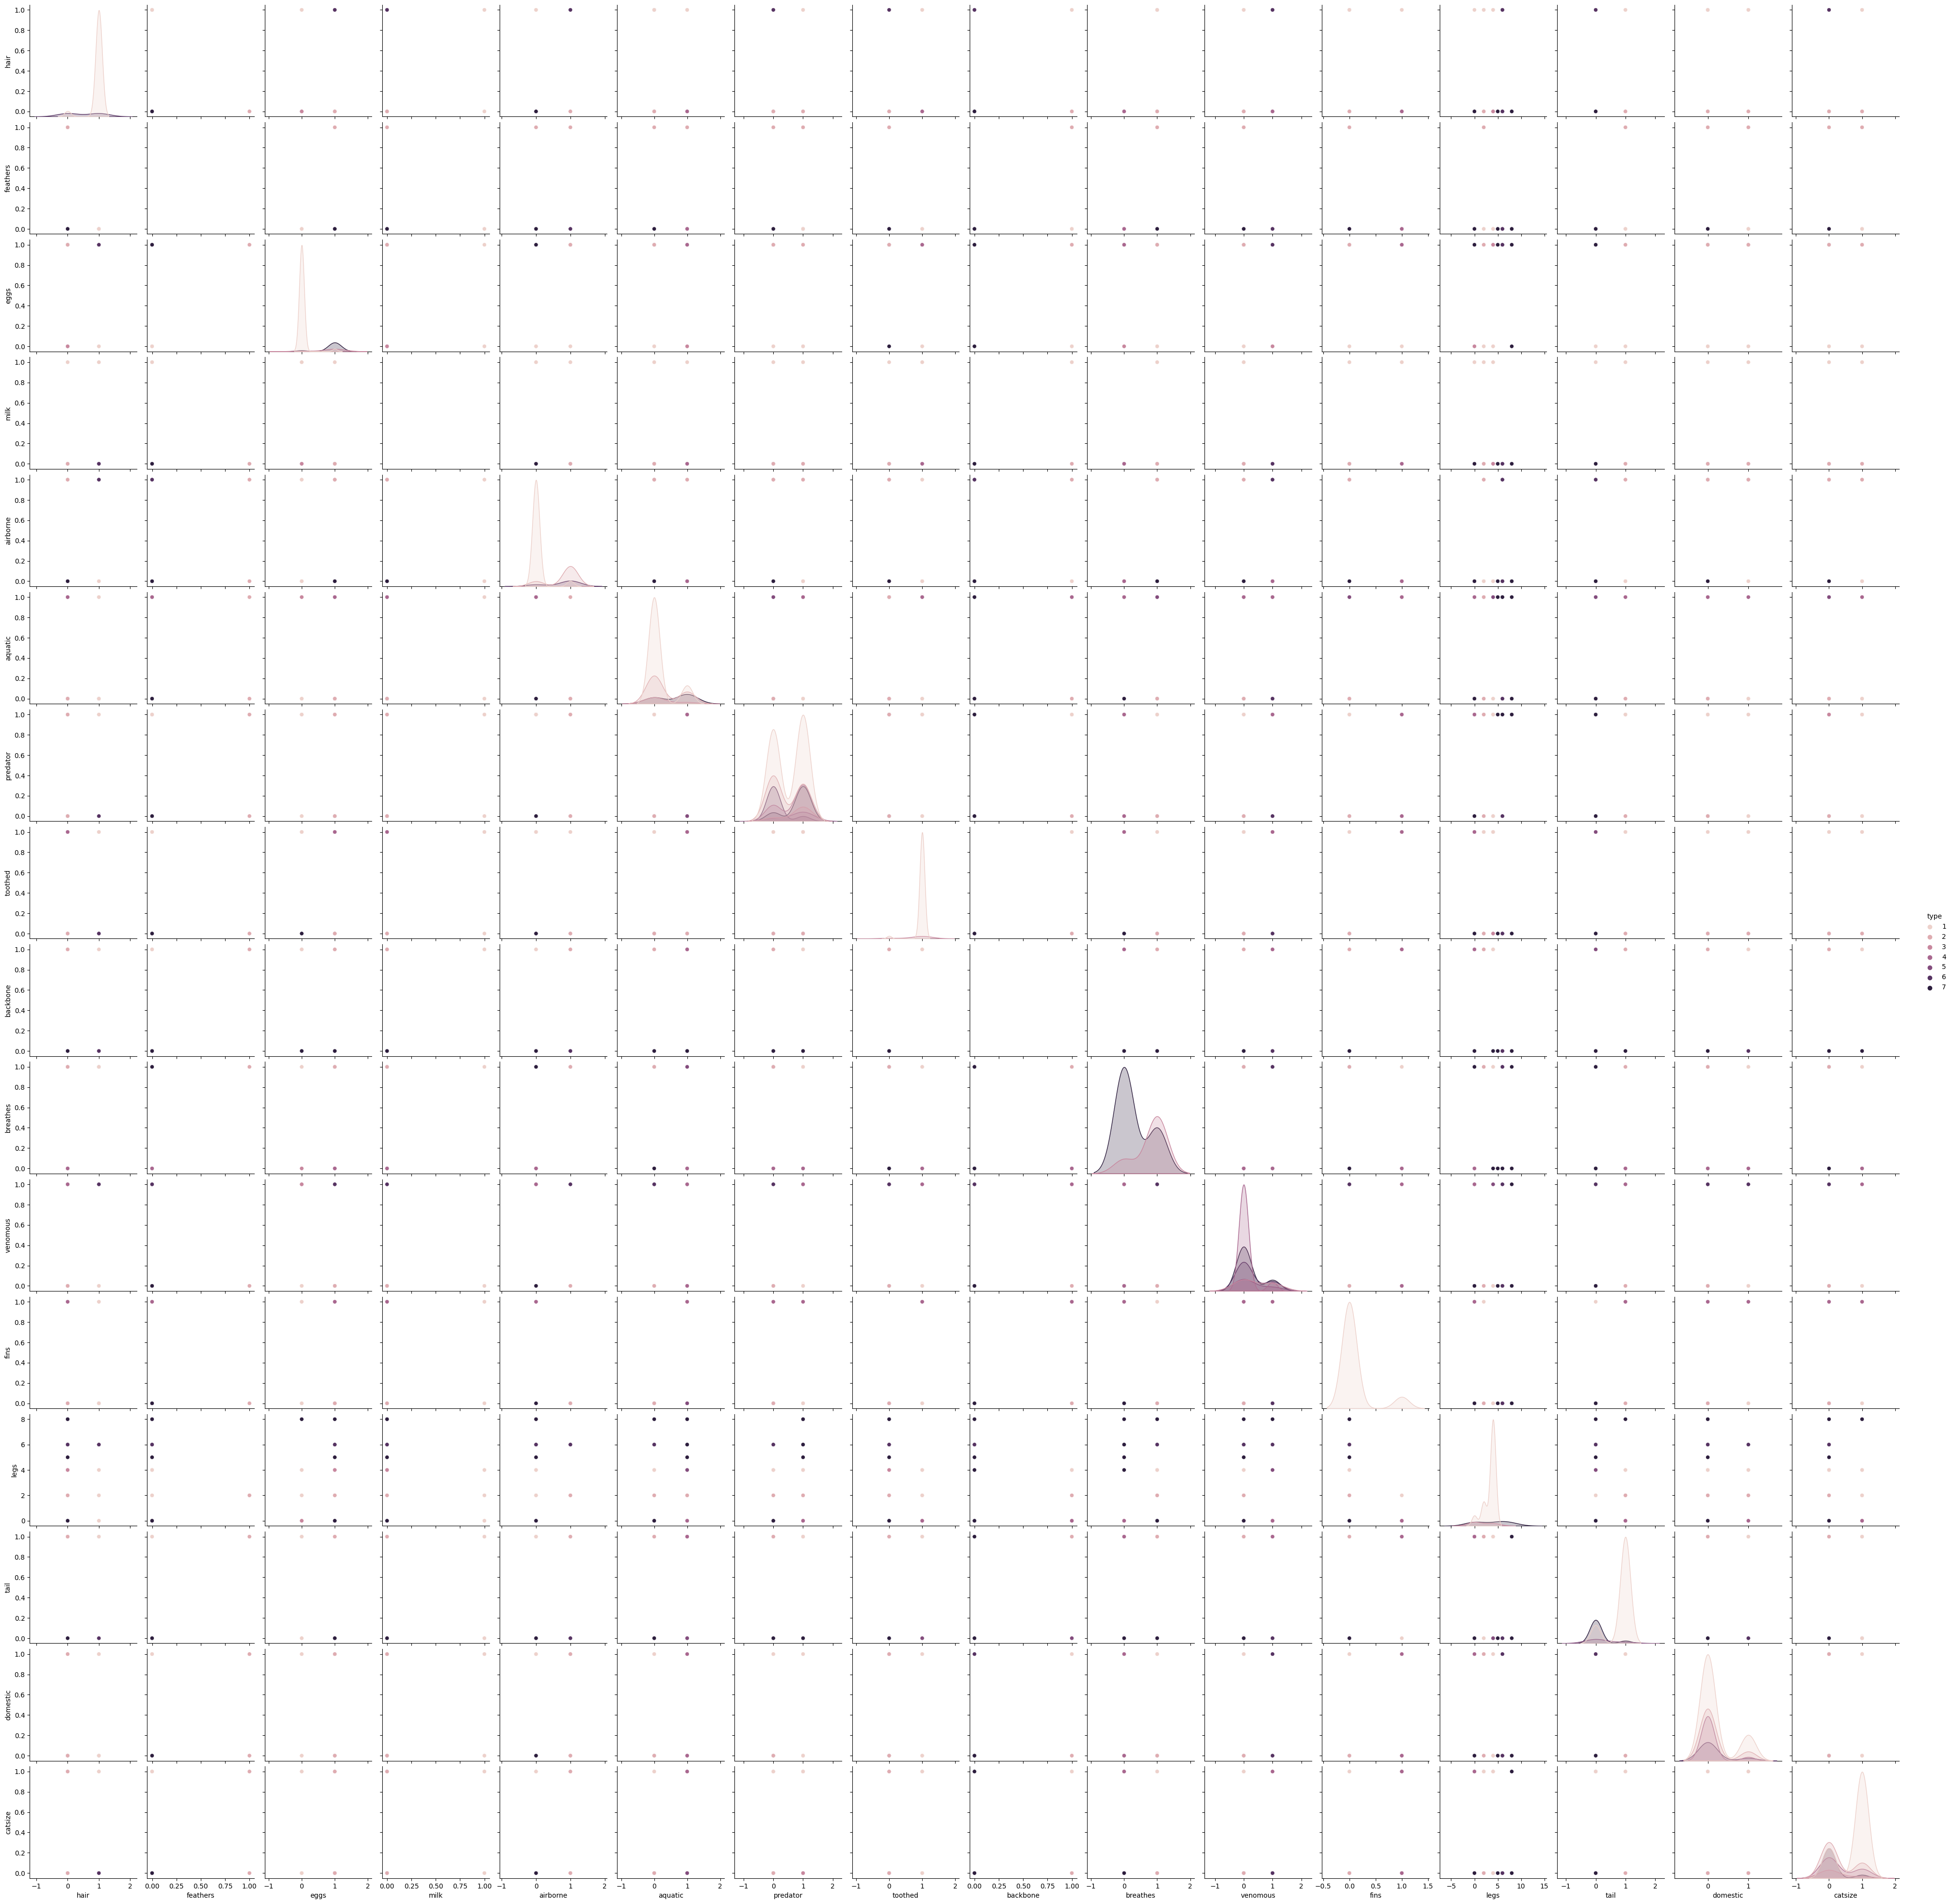

In [23]:
sns.pairplot(df,hue='type')
plt.show()

In [27]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


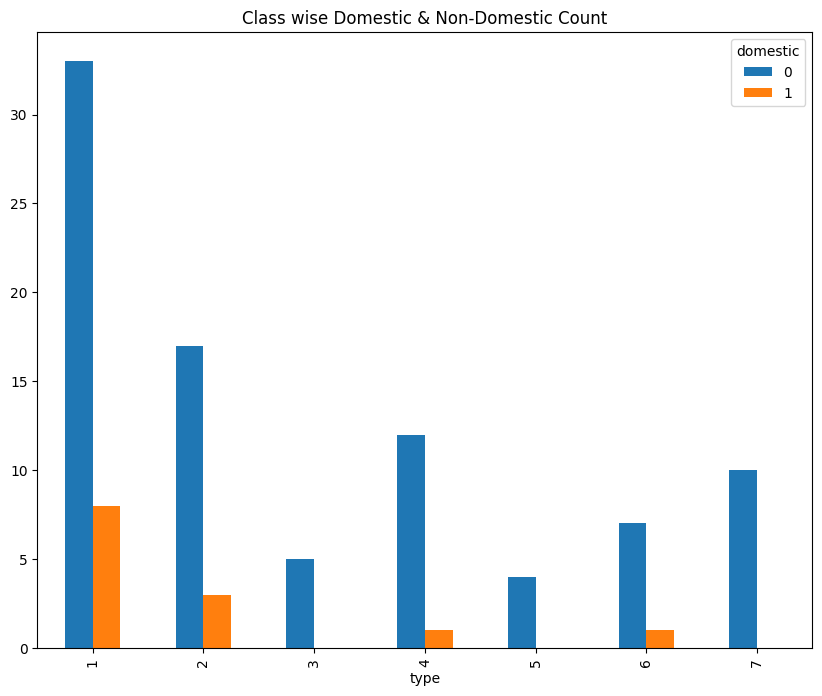

In [28]:
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [29]:
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [30]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


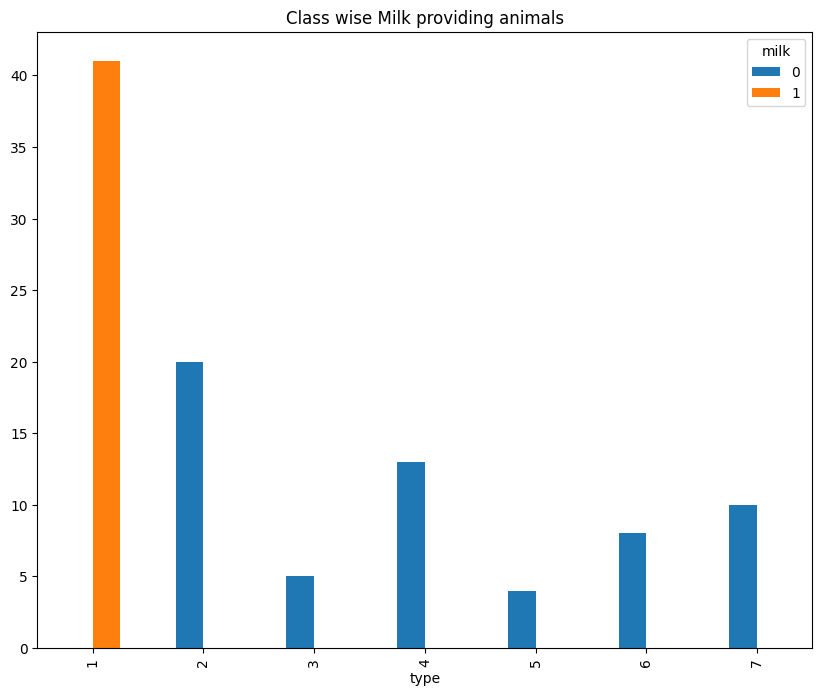

In [31]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [32]:
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [33]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

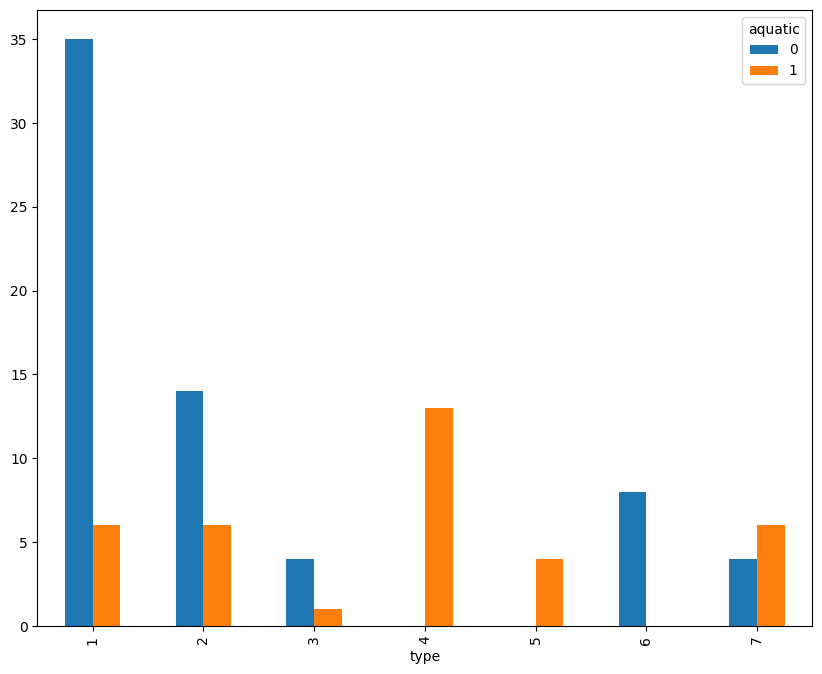

In [34]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));


In [35]:
type_list = [i for i in zoo.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [36]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [37]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)


In [38]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1


In [39]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0


In [40]:
Y_train

33    0
58    1
62    0
25    0
82    0
     ..
35    0
83    0
59    0
65    1
77    0
Name: catsize, Length: 70, dtype: int64

In [41]:
Y_test

55     1
0      1
16     0
12     0
24     0
56     1
17     1
18     1
13     0
100    0
47     1
72     0
71     1
36     0
32     1
5      1
2      0
86     1
14     0
97     0
30     0
41     0
27     0
80     0
60     1
44     1
7      0
21     0
95     1
63     1
15     0
Name: catsize, dtype: int64

In [42]:
num_folds = 10
kfold = KFold(n_splits=10)

In [43]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0    23
1     8
dtype: int64

In [45]:
pd.crosstab(Y_test,preds)

col_0,0,1
catsize,,
0,16,1
1,7,7


In [46]:
# Accuracy
np.mean(preds==Y_test)

0.7419354838709677

In [47]:
model.score(X_train,Y_train)

0.8285714285714286

In [48]:
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 74.19354838709677


In [49]:
results = cross_val_score(model, X, Y, cv=kfold)

In [50]:
print(results.mean()*100)

70.27272727272727


In [51]:
print(results.std()*100)

11.860414052114848


In [52]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [53]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [54]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


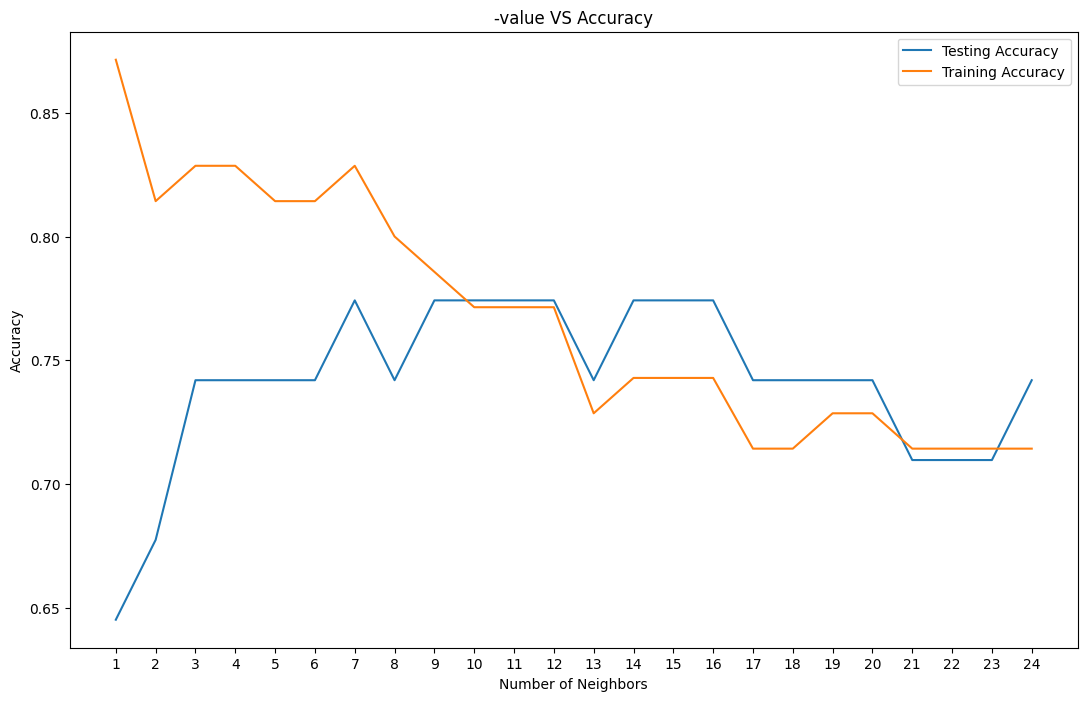

Best accuracy is 0.7741935483870968 with K = 7


In [55]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


KNN-glass

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [ ]:
glass = pd.read_csv('glass.csv')

In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass[glass.duplicated()].shape

(1, 10)

In [ ]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
df = glass.drop_duplicates()

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
corr = df.corr()

In [ ]:
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

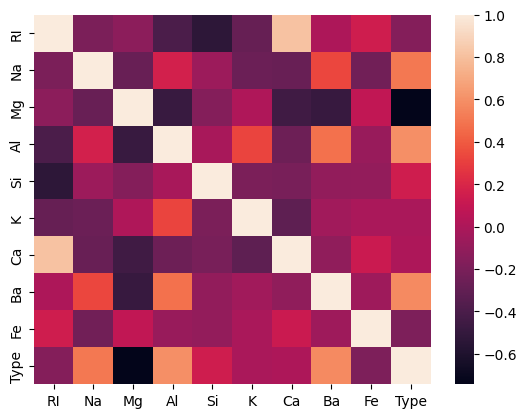

In [ ]:
sns.heatmap(corr)

<Axes: xlabel='RI', ylabel='Na'>

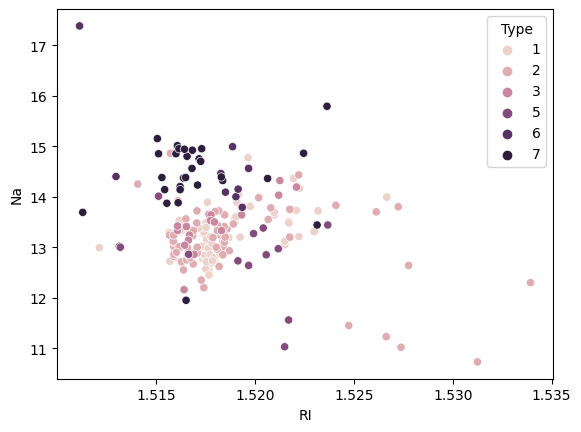

In [ ]:
sns.scatterplot(data=df,x="RI",y="Na",hue="Type")

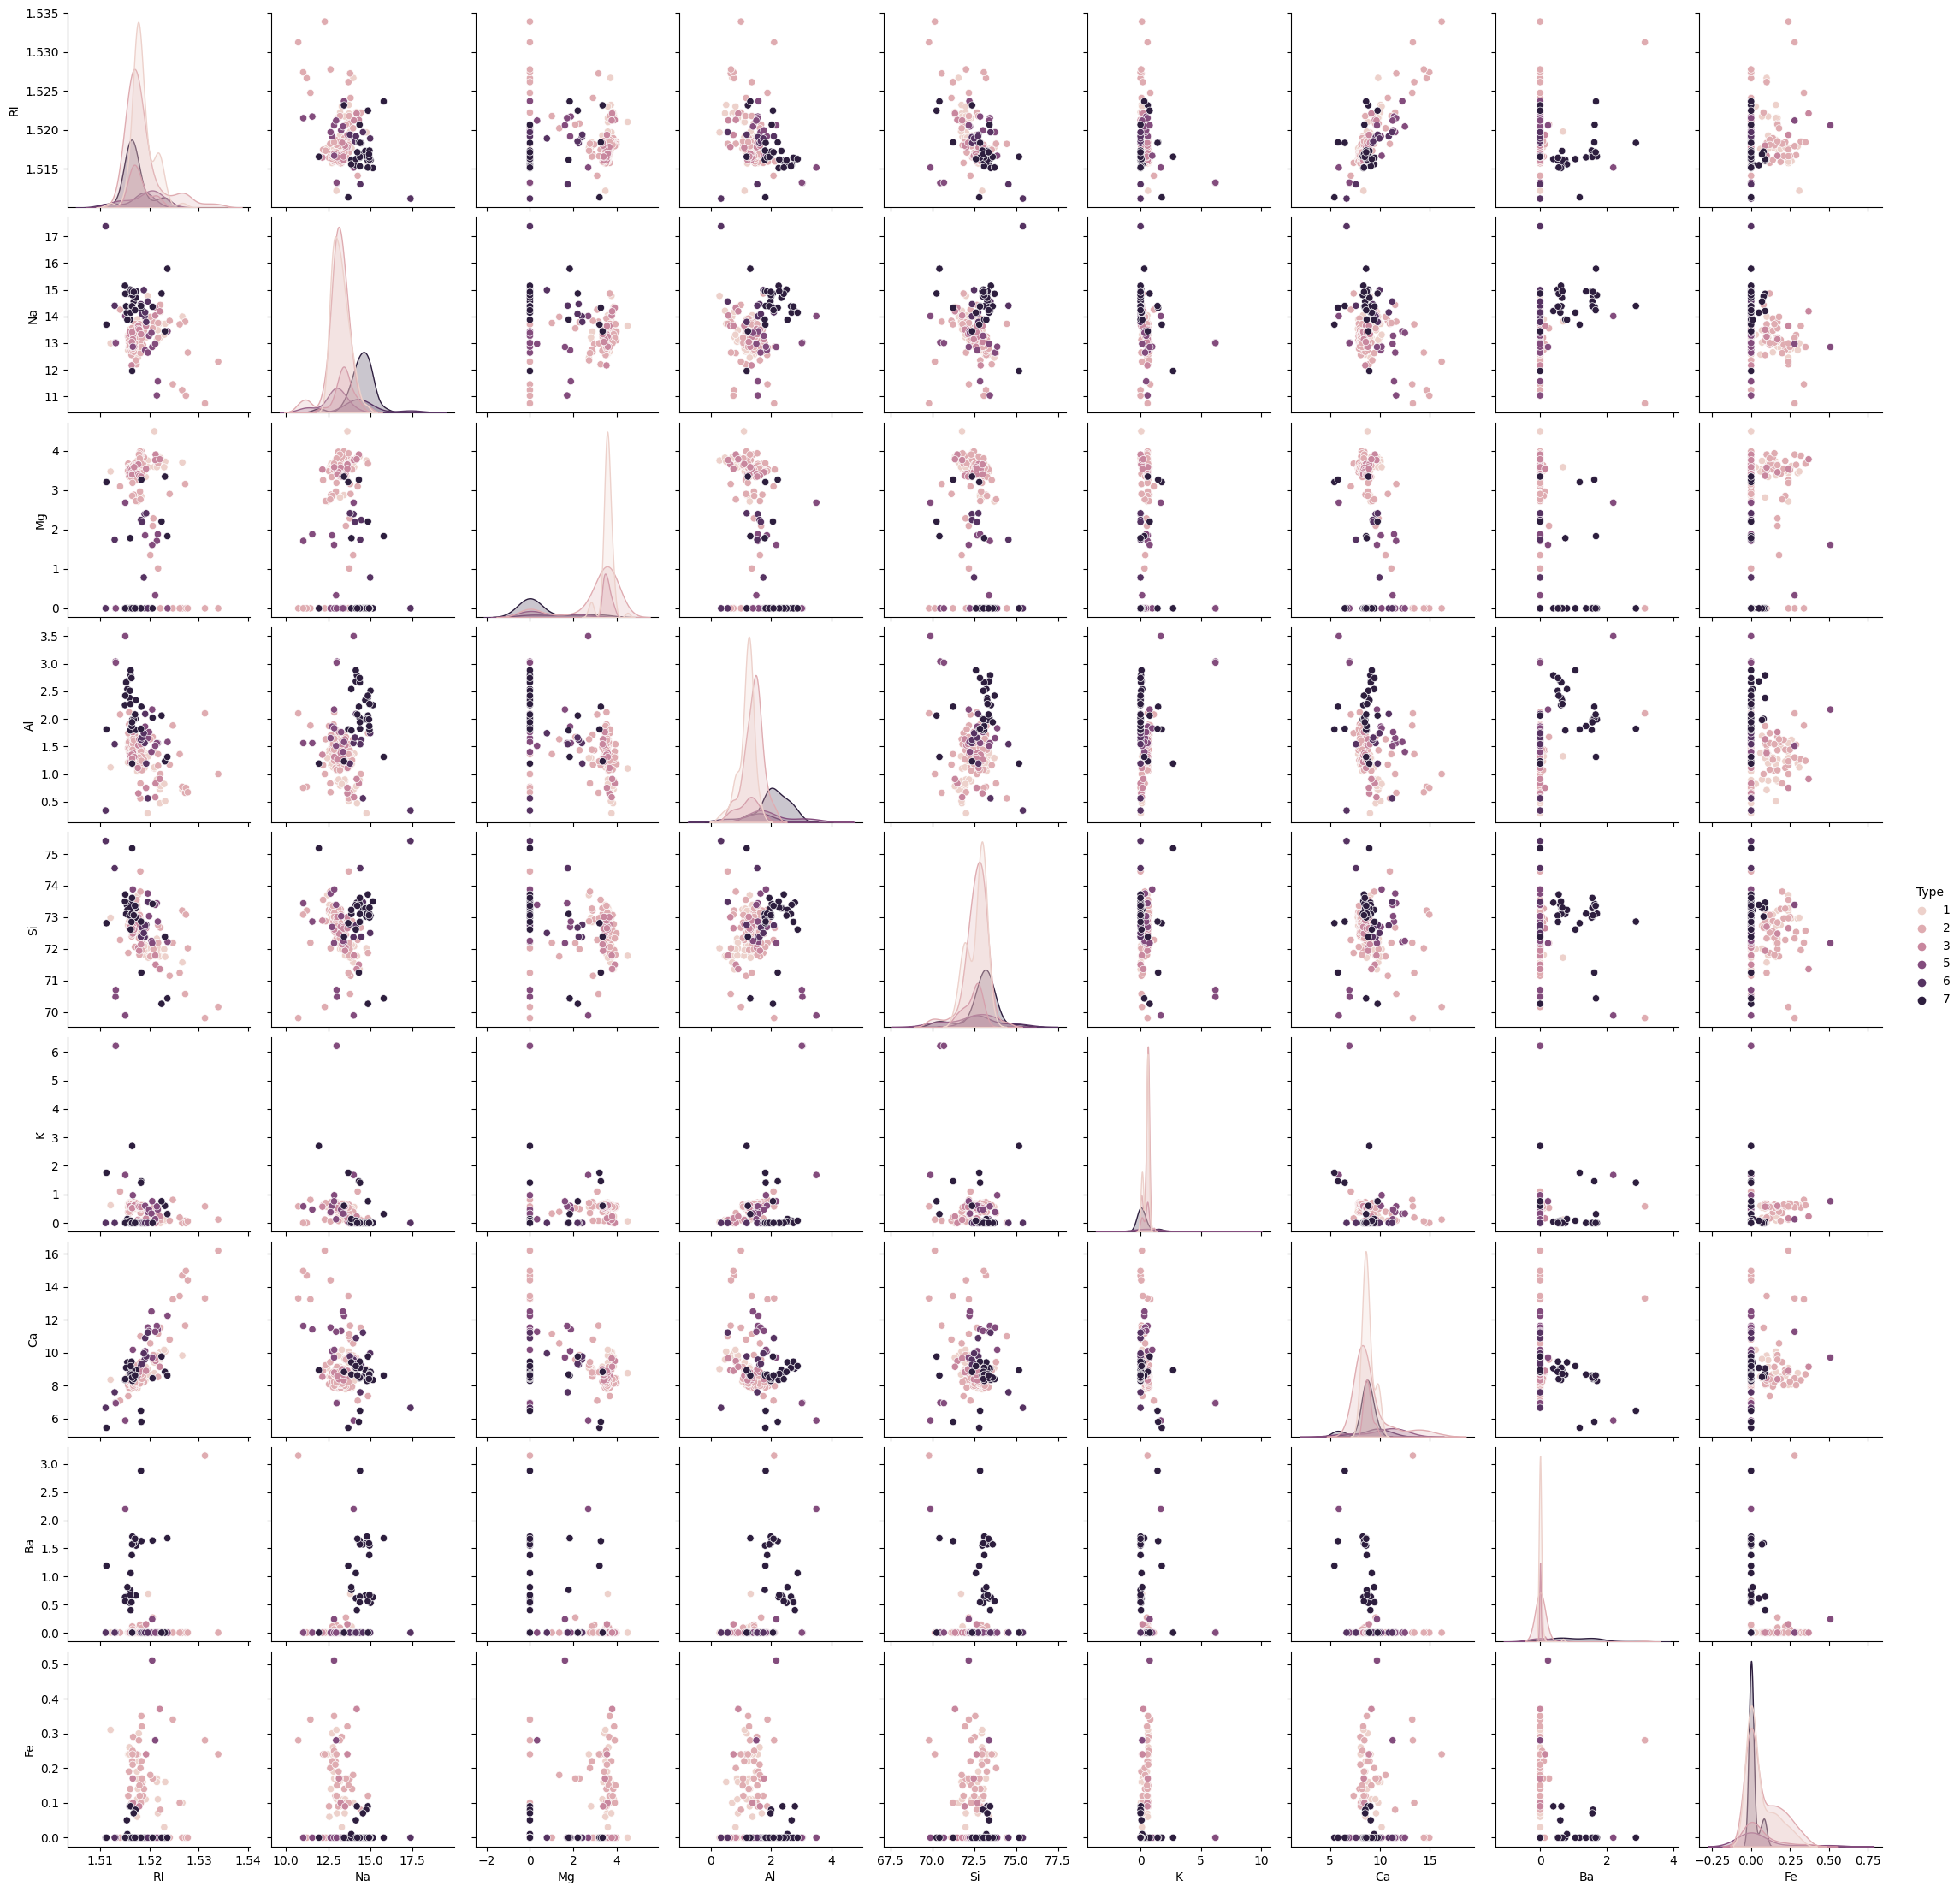

In [ ]:
sns.pairplot(df,hue='Type')
plt.show()

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
DF= df.iloc[:,0:9]

In [ ]:
DF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
array= DF.values

In [ ]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [ ]:
df_knn = pd.DataFrame(X,columns=df.columns[:-1])

In [ ]:
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [ ]:
x= df_knn
y= df['Type']

In [ ]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=45)


In [ ]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
185,0.010659,1.124177,0.403249,1.557355,-1.819617,1.474913,-2.224265,2.925383,-0.588301
202,-0.584217,1.713320,-1.860172,1.092483,0.589150,-0.765554,-0.473863,3.086325,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
72,-0.673449,-0.078656,0.618482,0.243586,0.278342,0.170531,-0.748022,-0.353808,-0.588301
58,-0.266950,-0.017287,0.680969,-0.524464,0.174739,0.109149,-0.480893,-0.353808,0.541526
...,...,...,...,...,...,...,...,...,...
32,-0.197547,-0.680073,0.555995,-0.443617,0.407845,0.170531,-0.277031,-0.172748,1.671354
124,0.123025,-0.581882,0.680969,0.223374,-0.187871,0.124494,-0.284060,-0.353808,0.644238
131,-0.071962,0.031808,0.903145,-0.544676,-0.213772,0.124494,-0.565249,-0.353808,-0.588301
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,0.109149,-0.101287,-0.353808,0.336103


In [ ]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
83,-1.407130,1.038260,0.285217,1.274389,-0.485730,0.922469,-1.317430,-0.353808,-0.588301
62,1.296254,0.940070,0.785114,-1.353149,-1.690113,-0.765554,0.517328,-0.353808,-0.588301
84,-0.693278,-0.054108,0.625425,0.081891,0.084086,-0.074999,-0.523071,-0.353808,-0.588301
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301
187,1.362351,1.786963,-0.332710,1.233966,-3.101703,0.400716,0.566537,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
115,-0.019084,-0.201394,0.847601,-0.079804,-0.420978,0.078457,-0.452774,-0.353808,0.438815
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
28,-0.220682,-1.036013,0.583767,-0.039380,0.640952,0.109149,-0.291090,-0.353808,-0.588301
113,0.040403,-0.373227,0.896202,-0.524464,-0.278524,0.155186,-0.368417,-0.353808,-0.588301


In [ ]:
y_train

186    7
203    7
211    7
73     2
59     1
      ..
32     1
125    2
132    2
159    3
204    7
Name: Type, Length: 149, dtype: int64

In [ ]:
y_test

84     2
63     1
85     2
138    2
188    7
      ..
116    2
4      1
28     1
114    2
126    2
Name: Type, Length: 64, dtype: int64

KNN MODEL

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    29
2    23
7     7
3     3
5     2
dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,7
Type,,,,,
1,16,2,1,0,0
2,6,19,2,1,0
3,6,2,0,0,0
7,1,0,0,1,7


In [ ]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 65.625


In [ ]:

model.score(x_train,y_train)

0.825503355704698

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.55      0.84      0.67        19
           2       0.83      0.68      0.75        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.66        64
   macro avg       0.48      0.46      0.46        64
weighted avg       0.67      0.66      0.65        64



In [ ]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


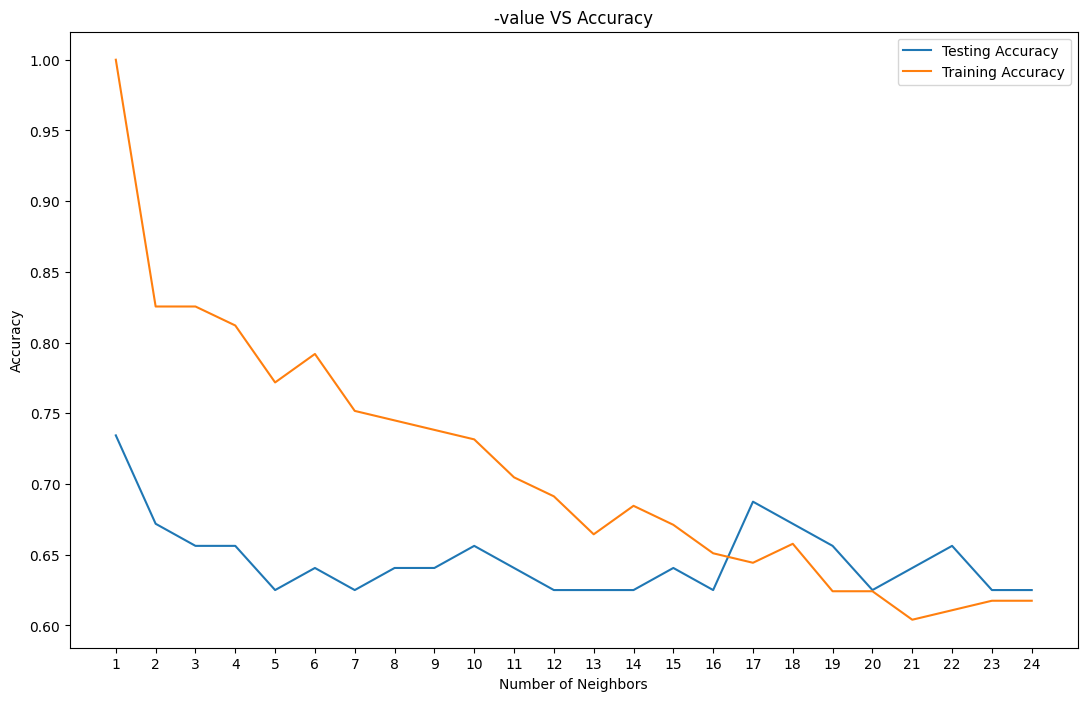

Best accuracy is 0.734375 with K = 1


In [ ]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
